## You are making 3 versions of your notebook

- Network with Group Normalization + L1
- Network with Layer Normalization + L2
- Network with L1 + L2 + BN

In [1]:
import model
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
from tqdm import tqdm
from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# For training set
train = datasets.MNIST('../data', train=True, download=True, #create directory and give the path, True for training set, download if dataset is not available in local storage
                    transform=transforms.Compose([
                        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
                        transforms.ToTensor(), # Convert image to tensor
                        transforms.Normalize((0.1307,), (0.3081,)),# Normalize image with mean and standard deviation
                        transforms.RandomRotation((-5.0, 5.0), fill=(0.1307,)),
                        ])
                    )


# For testing set
test = datasets.MNIST('../data', train=False,  # create the directory for testing dataset, train is false for testing 
                   transform=transforms.Compose([ 
                        transforms.ToTensor(), # Convert image to tensor
                        transforms.Normalize((0.1307,), (0.3081,)) # Normalize the data
                        ])
                   )

9920512it [00:00, 12747665.79it/s]                             


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw


32768it [00:00, 382276.08it/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw


1654784it [00:00, 5619481.98it/s]                            


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw


8192it [00:00, 104661.17it/s]
C:\Users\TUSHAR\anaconda3\envs\gputest\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw
Processing...
Done!


In [3]:
SEED = 1
BATCH_SIZE=64

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available: True


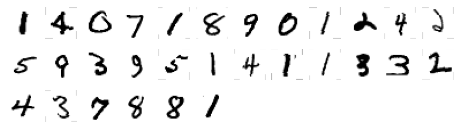

In [4]:
figure = plt.figure(figsize=(8,6))
dataiter = iter(train_loader)
images, labels = dataiter.next()
num_of_images = 30
for index in range(1, num_of_images + 1):
    plt.subplot(8, 12, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_gn = model.Net(norm='gn').to(device)
summary(model_gn, input_size=(1, 28, 28))

cuda
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─GroupNorm: 2-2                    16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─GroupNorm: 2-6                    32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─GroupNorm: 2-10                   16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─GroupNorm: 2-13                   24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─GroupNo

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─GroupNorm: 2-2                    16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─GroupNorm: 2-6                    32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─GroupNorm: 2-10                   16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─GroupNorm: 2-13                   24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─GroupNorm: 2

In [6]:
summary(model.Net(norm='ln').to(device), input_size=(1, 28, 28))

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─GroupNorm: 2-2                    16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─GroupNorm: 2-6                    32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─GroupNorm: 2-10                   16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─GroupNorm: 2-13                   24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─GroupNorm: 2

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─GroupNorm: 2-2                    16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─GroupNorm: 2-6                    32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─GroupNorm: 2-10                   16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─GroupNorm: 2-13                   24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─GroupNorm: 2

In [7]:
summary(model.Net(norm='bn').to(device), input_size=(1, 28, 28))

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─BatchNorm2d: 2-2                  16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─BatchNorm2d: 2-6                  32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─BatchNorm2d: 2-10                 16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─BatchNorm2d: 2-13                 24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─BatchNorm2d:

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       72
|    └─BatchNorm2d: 2-2                  16
|    └─ReLU: 2-3                         --
|    └─Dropout: 2-4                      --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-5                       1,152
|    └─BatchNorm2d: 2-6                  32
|    └─ReLU: 2-7                         --
|    └─Dropout: 2-8                      --
├─MaxPool2d: 1-3                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-9                       128
|    └─BatchNorm2d: 2-10                 16
|    └─ReLU: 2-11                        --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-12                      864
|    └─BatchNorm2d: 2-13                 24
|    └─ReLU: 2-14                        --
|    └─Dropout: 2-15                     --
|    └─Conv2d: 2-16                      1,728
|    └─BatchNorm2d:

In [8]:
def train(model, device, train_loader, optimizer, l1, scheduler):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  num_loops = 0
  train_loss = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch 
    # accumulates the gradients on subsequent backward passes. Because of this, when you start your training loop, 
    # ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    l1 = 0
    lambda_l1 = 0.01
    if l1:
      for p in model.parameter():
        l1 = l1 + p.abs().sum()
    
    loss = loss + lambda_l1*l1

    # Backpropagation
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

    # Update LR
    scheduler.step()
    
    # Update pbar-tqdm    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    num_loops += 1
    pbar.set_description(desc= f'Batch_id={batch_idx} Loss={train_loss/num_loops:.5f} Accuracy={100*correct/processed:0.2f}')
  
  return 100*correct/processed, train_loss/num_loops


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    
    return 100. * correct / len(test_loader.dataset), test_loss

In [9]:
def save_model(model, epoch, optimizer, name_exp):
  state = {
    'epoch': epoch,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()}
  torch.save(state, name_exp+'.pt')

In [10]:
def fit(norm, NUM_EPOCHS=20, l1=False, l2=False, drop= 0.025, num_groups=4, exp_name='experiment'):
  training_acc, training_loss, testing_acc, testing_loss = list(), list(), list(), list()
  best_accuracy = 0
  net =  model.Net(norm=norm, drop=drop, num_groups=num_groups).to(device)
  if l2:
    optimizer = optim.SGD(net.parameters(), lr=0.017, momentum=0.9, weight_decay=1e-4)
  else:
    optimizer = optim.SGD(net.parameters(), lr=0.017, momentum=0.9)
  scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.017, epochs=NUM_EPOCHS, steps_per_epoch=len(train_loader))

  for epoch in range(1,NUM_EPOCHS+1):
      print("EPOCH:", epoch)
      train_acc, train_loss = train(net, device, train_loader, optimizer, l1, scheduler)
      test_acc, test_loss = test(net, device, test_loader)

      if(test_acc > best_accuracy):
        best_accuracy = test_acc
        #Save this model
        save_model(net, epoch, optimizer, exp_name)

      training_acc.append(train_acc)
      training_loss.append(train_loss)
      testing_acc.append(test_acc)
      testing_loss.append(test_loss)
      
  return net, (training_acc, training_loss, testing_acc, testing_loss)

# Model Version 1: 
Network with Group Normalization + L1

In [11]:
exp_name = 'model_GN+L1'
model_gn, history_gn = fit(norm='gn', NUM_EPOCHS=25, l1=True, exp_name=exp_name)

#Load the best model for further evalution
model_gn = model.Net(norm='gn').to(device)
model_gn.load_state_dict(torch.load(exp_name+'.pt')['state_dict'])
ep = torch.load(exp_name+'.pt')['epoch']
print('Best Model loss=', history_gn[3][ep-1], "Accuracy= ",  history_gn[2][ep-1])

EPOCH: 1


Batch_id=937 Loss=1.18697 Accuracy=67.29: 100%|██████████| 938/938 [00:27<00:00, 34.40it/s]



Test set: Average loss: 0.2774, Accuracy: 9446/10000 (94.46%)

EPOCH: 2


Batch_id=937 Loss=0.25115 Accuracy=93.26: 100%|██████████| 938/938 [00:25<00:00, 37.01it/s]



Test set: Average loss: 0.1386, Accuracy: 9622/10000 (96.22%)

EPOCH: 3


Batch_id=937 Loss=0.14935 Accuracy=95.70: 100%|██████████| 938/938 [00:25<00:00, 37.30it/s]



Test set: Average loss: 0.1043, Accuracy: 9689/10000 (96.89%)

EPOCH: 4


Batch_id=937 Loss=0.11744 Accuracy=96.59: 100%|██████████| 938/938 [00:25<00:00, 36.69it/s]



Test set: Average loss: 0.0596, Accuracy: 9826/10000 (98.26%)

EPOCH: 5


Batch_id=937 Loss=0.09312 Accuracy=97.39: 100%|██████████| 938/938 [00:26<00:00, 35.87it/s]



Test set: Average loss: 0.0721, Accuracy: 9779/10000 (97.79%)

EPOCH: 6


Batch_id=937 Loss=0.08563 Accuracy=97.56: 100%|██████████| 938/938 [00:25<00:00, 36.97it/s]



Test set: Average loss: 0.0625, Accuracy: 9814/10000 (98.14%)

EPOCH: 7


Batch_id=937 Loss=0.07119 Accuracy=98.00: 100%|██████████| 938/938 [00:25<00:00, 36.59it/s]



Test set: Average loss: 0.0540, Accuracy: 9836/10000 (98.36%)

EPOCH: 8


Batch_id=937 Loss=0.06464 Accuracy=98.20: 100%|██████████| 938/938 [00:25<00:00, 36.55it/s]



Test set: Average loss: 0.0438, Accuracy: 9874/10000 (98.74%)

EPOCH: 9


Batch_id=937 Loss=0.06024 Accuracy=98.29: 100%|██████████| 938/938 [00:25<00:00, 36.54it/s]



Test set: Average loss: 0.0380, Accuracy: 9887/10000 (98.87%)

EPOCH: 10


Batch_id=937 Loss=0.05842 Accuracy=98.31: 100%|██████████| 938/938 [00:25<00:00, 36.83it/s]



Test set: Average loss: 0.0474, Accuracy: 9863/10000 (98.63%)

EPOCH: 11


Batch_id=937 Loss=0.04905 Accuracy=98.59: 100%|██████████| 938/938 [00:25<00:00, 36.58it/s]



Test set: Average loss: 0.0324, Accuracy: 9911/10000 (99.11%)

EPOCH: 12


Batch_id=937 Loss=0.04686 Accuracy=98.64: 100%|██████████| 938/938 [00:25<00:00, 36.88it/s]



Test set: Average loss: 0.0366, Accuracy: 9891/10000 (98.91%)

EPOCH: 13


Batch_id=937 Loss=0.04642 Accuracy=98.66: 100%|██████████| 938/938 [00:25<00:00, 36.57it/s]



Test set: Average loss: 0.0266, Accuracy: 9923/10000 (99.23%)

EPOCH: 14


Batch_id=937 Loss=0.04516 Accuracy=98.73: 100%|██████████| 938/938 [00:25<00:00, 37.31it/s]



Test set: Average loss: 0.0353, Accuracy: 9893/10000 (98.93%)

EPOCH: 15


Batch_id=937 Loss=0.04271 Accuracy=98.78: 100%|██████████| 938/938 [00:25<00:00, 36.74it/s]



Test set: Average loss: 0.0306, Accuracy: 9911/10000 (99.11%)

EPOCH: 16


Batch_id=937 Loss=0.03989 Accuracy=98.85: 100%|██████████| 938/938 [00:25<00:00, 37.17it/s]



Test set: Average loss: 0.0294, Accuracy: 9913/10000 (99.13%)

EPOCH: 17


Batch_id=937 Loss=0.03768 Accuracy=98.91: 100%|██████████| 938/938 [00:25<00:00, 36.97it/s]



Test set: Average loss: 0.0312, Accuracy: 9902/10000 (99.02%)

EPOCH: 18


Batch_id=937 Loss=0.03387 Accuracy=99.03: 100%|██████████| 938/938 [00:25<00:00, 36.68it/s]



Test set: Average loss: 0.0316, Accuracy: 9913/10000 (99.13%)

EPOCH: 19


Batch_id=937 Loss=0.02923 Accuracy=99.19: 100%|██████████| 938/938 [00:25<00:00, 36.51it/s]



Test set: Average loss: 0.0267, Accuracy: 9925/10000 (99.25%)

EPOCH: 20


Batch_id=937 Loss=0.02850 Accuracy=99.19: 100%|██████████| 938/938 [00:25<00:00, 36.64it/s]



Test set: Average loss: 0.0260, Accuracy: 9921/10000 (99.21%)

EPOCH: 21


Batch_id=937 Loss=0.02687 Accuracy=99.21: 100%|██████████| 938/938 [00:25<00:00, 36.67it/s]



Test set: Average loss: 0.0282, Accuracy: 9922/10000 (99.22%)

EPOCH: 22


Batch_id=937 Loss=0.02274 Accuracy=99.37: 100%|██████████| 938/938 [00:25<00:00, 36.54it/s]



Test set: Average loss: 0.0237, Accuracy: 9936/10000 (99.36%)

EPOCH: 23


Batch_id=937 Loss=0.02260 Accuracy=99.34: 100%|██████████| 938/938 [00:25<00:00, 36.95it/s]



Test set: Average loss: 0.0234, Accuracy: 9930/10000 (99.30%)

EPOCH: 24


Batch_id=937 Loss=0.02043 Accuracy=99.43: 100%|██████████| 938/938 [00:25<00:00, 37.03it/s]



Test set: Average loss: 0.0238, Accuracy: 9930/10000 (99.30%)

EPOCH: 25


Batch_id=937 Loss=0.01917 Accuracy=99.43: 100%|██████████| 938/938 [00:25<00:00, 36.40it/s]



Test set: Average loss: 0.0235, Accuracy: 9929/10000 (99.29%)

Best Model loss= 0.02369926312426105 Accuracy=  99.36


# Model Version 2: 
Network with Layer Normalization + L2

In [12]:
exp_name = 'model_LN+L2'
model_ln, history_ln = fit(norm='ln', NUM_EPOCHS=25, l2=True, exp_name=exp_name)

#Load the best model for further evalution
model_ln = model.Net(norm='ln').to(device)
model_ln.load_state_dict(torch.load(exp_name+'.pt')['state_dict'])
ep = torch.load(exp_name+'.pt')['epoch']
print('Best Model loss=', history_ln[3][ep-1], "Accuracy= ",  history_ln[2][ep-1])

EPOCH: 1


Batch_id=937 Loss=1.12056 Accuracy=69.08: 100%|██████████| 938/938 [00:30<00:00, 30.69it/s]



Test set: Average loss: 0.2947, Accuracy: 9319/10000 (93.19%)

EPOCH: 2


Batch_id=937 Loss=0.22445 Accuracy=93.61: 100%|██████████| 938/938 [00:31<00:00, 29.75it/s]



Test set: Average loss: 0.1252, Accuracy: 9652/10000 (96.52%)

EPOCH: 3


Batch_id=937 Loss=0.14039 Accuracy=95.92: 100%|██████████| 938/938 [00:29<00:00, 31.57it/s]



Test set: Average loss: 0.0951, Accuracy: 9713/10000 (97.13%)

EPOCH: 4


Batch_id=937 Loss=0.10689 Accuracy=96.92: 100%|██████████| 938/938 [00:23<00:00, 40.20it/s]



Test set: Average loss: 0.0756, Accuracy: 9796/10000 (97.96%)

EPOCH: 5


Batch_id=937 Loss=0.08671 Accuracy=97.50: 100%|██████████| 938/938 [00:23<00:00, 40.67it/s]



Test set: Average loss: 0.0549, Accuracy: 9827/10000 (98.27%)

EPOCH: 6


Batch_id=937 Loss=0.07614 Accuracy=97.76: 100%|██████████| 938/938 [00:24<00:00, 38.55it/s]



Test set: Average loss: 0.0525, Accuracy: 9840/10000 (98.40%)

EPOCH: 7


Batch_id=937 Loss=0.06691 Accuracy=97.96: 100%|██████████| 938/938 [00:31<00:00, 29.77it/s]



Test set: Average loss: 0.0368, Accuracy: 9893/10000 (98.93%)

EPOCH: 8


Batch_id=937 Loss=0.06207 Accuracy=98.17: 100%|██████████| 938/938 [00:27<00:00, 33.93it/s]



Test set: Average loss: 0.0406, Accuracy: 9867/10000 (98.67%)

EPOCH: 9


Batch_id=937 Loss=0.05772 Accuracy=98.28: 100%|██████████| 938/938 [00:29<00:00, 31.86it/s]



Test set: Average loss: 0.0317, Accuracy: 9904/10000 (99.04%)

EPOCH: 10


Batch_id=937 Loss=0.05118 Accuracy=98.45: 100%|██████████| 938/938 [00:32<00:00, 29.30it/s]



Test set: Average loss: 0.0307, Accuracy: 9909/10000 (99.09%)

EPOCH: 11


Batch_id=937 Loss=0.04839 Accuracy=98.59: 100%|██████████| 938/938 [00:23<00:00, 40.25it/s]



Test set: Average loss: 0.0307, Accuracy: 9906/10000 (99.06%)

EPOCH: 12


Batch_id=937 Loss=0.04673 Accuracy=98.61: 100%|██████████| 938/938 [00:23<00:00, 39.72it/s]



Test set: Average loss: 0.0247, Accuracy: 9919/10000 (99.19%)

EPOCH: 13


Batch_id=937 Loss=0.04363 Accuracy=98.69: 100%|██████████| 938/938 [00:23<00:00, 40.23it/s]



Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99.21%)

EPOCH: 14


Batch_id=937 Loss=0.04114 Accuracy=98.72: 100%|██████████| 938/938 [00:23<00:00, 40.03it/s]



Test set: Average loss: 0.0216, Accuracy: 9938/10000 (99.38%)

EPOCH: 15


Batch_id=937 Loss=0.03930 Accuracy=98.84: 100%|██████████| 938/938 [00:23<00:00, 39.71it/s]



Test set: Average loss: 0.0240, Accuracy: 9927/10000 (99.27%)

EPOCH: 16


Batch_id=937 Loss=0.03710 Accuracy=98.91: 100%|██████████| 938/938 [00:23<00:00, 40.26it/s]



Test set: Average loss: 0.0257, Accuracy: 9927/10000 (99.27%)

EPOCH: 17


Batch_id=937 Loss=0.03569 Accuracy=98.90: 100%|██████████| 938/938 [00:23<00:00, 39.82it/s]



Test set: Average loss: 0.0285, Accuracy: 9914/10000 (99.14%)

EPOCH: 18


Batch_id=937 Loss=0.03387 Accuracy=99.00: 100%|██████████| 938/938 [00:23<00:00, 39.97it/s]



Test set: Average loss: 0.0226, Accuracy: 9927/10000 (99.27%)

EPOCH: 19


Batch_id=937 Loss=0.03028 Accuracy=99.12: 100%|██████████| 938/938 [00:23<00:00, 39.93it/s]



Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

EPOCH: 20


Batch_id=937 Loss=0.02709 Accuracy=99.19: 100%|██████████| 938/938 [00:23<00:00, 39.38it/s]



Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

EPOCH: 21


Batch_id=937 Loss=0.02564 Accuracy=99.24: 100%|██████████| 938/938 [00:23<00:00, 39.40it/s]



Test set: Average loss: 0.0207, Accuracy: 9943/10000 (99.43%)

EPOCH: 22


Batch_id=937 Loss=0.02326 Accuracy=99.28: 100%|██████████| 938/938 [00:25<00:00, 36.55it/s]



Test set: Average loss: 0.0184, Accuracy: 9950/10000 (99.50%)

EPOCH: 23


Batch_id=937 Loss=0.01969 Accuracy=99.39: 100%|██████████| 938/938 [00:23<00:00, 39.70it/s]



Test set: Average loss: 0.0190, Accuracy: 9945/10000 (99.45%)

EPOCH: 24


Batch_id=937 Loss=0.02005 Accuracy=99.41: 100%|██████████| 938/938 [00:23<00:00, 39.68it/s]



Test set: Average loss: 0.0190, Accuracy: 9943/10000 (99.43%)

EPOCH: 25


Batch_id=937 Loss=0.01918 Accuracy=99.42: 100%|██████████| 938/938 [00:26<00:00, 35.14it/s]



Test set: Average loss: 0.0185, Accuracy: 9942/10000 (99.42%)

Best Model loss= 0.018405990533204748 Accuracy=  99.5


# Model Version 3: 
Network with L1 + L2 + BN

In [13]:
exp_name = 'model_BN+L1+L2'
model_bn, history_bn = fit(norm='bn', NUM_EPOCHS=25, l1=True, l2=True, exp_name=exp_name)

#Load the best model for further evalution
model_bn = model.Net(norm='bn').to(device)
model_bn.load_state_dict(torch.load(exp_name+'.pt')['state_dict'])
ep = torch.load(exp_name+'.pt')['epoch']
print('Best Model loss=', history_bn[3][ep-1], "Accuracy= ",  history_bn[2][ep-1])

EPOCH: 1


Batch_id=937 Loss=0.84193 Accuracy=80.39: 100%|██████████| 938/938 [00:24<00:00, 38.36it/s]



Test set: Average loss: 0.1482, Accuracy: 9697/10000 (96.97%)

EPOCH: 2


Batch_id=937 Loss=0.14730 Accuracy=96.46: 100%|██████████| 938/938 [00:25<00:00, 36.96it/s]



Test set: Average loss: 0.0574, Accuracy: 9841/10000 (98.41%)

EPOCH: 3


Batch_id=937 Loss=0.09672 Accuracy=97.29: 100%|██████████| 938/938 [00:25<00:00, 37.22it/s]



Test set: Average loss: 0.0440, Accuracy: 9870/10000 (98.70%)

EPOCH: 4


Batch_id=937 Loss=0.07755 Accuracy=97.80: 100%|██████████| 938/938 [00:26<00:00, 35.75it/s]



Test set: Average loss: 0.0507, Accuracy: 9850/10000 (98.50%)

EPOCH: 5


Batch_id=937 Loss=0.06773 Accuracy=97.97: 100%|██████████| 938/938 [00:25<00:00, 36.34it/s]



Test set: Average loss: 0.0367, Accuracy: 9897/10000 (98.97%)

EPOCH: 6


Batch_id=937 Loss=0.05968 Accuracy=98.18: 100%|██████████| 938/938 [00:25<00:00, 37.06it/s]



Test set: Average loss: 0.0325, Accuracy: 9901/10000 (99.01%)

EPOCH: 7


Batch_id=937 Loss=0.05593 Accuracy=98.28: 100%|██████████| 938/938 [00:25<00:00, 37.34it/s]



Test set: Average loss: 0.0309, Accuracy: 9896/10000 (98.96%)

EPOCH: 8


Batch_id=937 Loss=0.05065 Accuracy=98.47: 100%|██████████| 938/938 [00:25<00:00, 36.61it/s]



Test set: Average loss: 0.0331, Accuracy: 9903/10000 (99.03%)

EPOCH: 9


Batch_id=937 Loss=0.04627 Accuracy=98.59: 100%|██████████| 938/938 [00:25<00:00, 36.56it/s]



Test set: Average loss: 0.0261, Accuracy: 9916/10000 (99.16%)

EPOCH: 10


Batch_id=937 Loss=0.04501 Accuracy=98.64: 100%|██████████| 938/938 [00:25<00:00, 36.90it/s]



Test set: Average loss: 0.0239, Accuracy: 9928/10000 (99.28%)

EPOCH: 11


Batch_id=937 Loss=0.04066 Accuracy=98.75: 100%|██████████| 938/938 [00:26<00:00, 36.07it/s]



Test set: Average loss: 0.0284, Accuracy: 9913/10000 (99.13%)

EPOCH: 12


Batch_id=937 Loss=0.03933 Accuracy=98.81: 100%|██████████| 938/938 [00:25<00:00, 36.66it/s]



Test set: Average loss: 0.0218, Accuracy: 9940/10000 (99.40%)

EPOCH: 13


Batch_id=937 Loss=0.03698 Accuracy=98.88: 100%|██████████| 938/938 [00:25<00:00, 36.42it/s]



Test set: Average loss: 0.0252, Accuracy: 9925/10000 (99.25%)

EPOCH: 14


Batch_id=937 Loss=0.03400 Accuracy=98.94: 100%|██████████| 938/938 [00:25<00:00, 37.06it/s]



Test set: Average loss: 0.0205, Accuracy: 9936/10000 (99.36%)

EPOCH: 15


Batch_id=937 Loss=0.03411 Accuracy=98.93: 100%|██████████| 938/938 [00:26<00:00, 35.39it/s]



Test set: Average loss: 0.0207, Accuracy: 9931/10000 (99.31%)

EPOCH: 16


Batch_id=937 Loss=0.03291 Accuracy=98.99: 100%|██████████| 938/938 [00:27<00:00, 34.28it/s]



Test set: Average loss: 0.0182, Accuracy: 9946/10000 (99.46%)

EPOCH: 17


Batch_id=937 Loss=0.03130 Accuracy=99.03: 100%|██████████| 938/938 [00:25<00:00, 36.94it/s]



Test set: Average loss: 0.0181, Accuracy: 9938/10000 (99.38%)

EPOCH: 18


Batch_id=937 Loss=0.03026 Accuracy=99.07: 100%|██████████| 938/938 [00:25<00:00, 36.57it/s]



Test set: Average loss: 0.0171, Accuracy: 9945/10000 (99.45%)

EPOCH: 19


Batch_id=937 Loss=0.02837 Accuracy=99.14: 100%|██████████| 938/938 [00:25<00:00, 36.72it/s]



Test set: Average loss: 0.0174, Accuracy: 9949/10000 (99.49%)

EPOCH: 20


Batch_id=937 Loss=0.02723 Accuracy=99.19: 100%|██████████| 938/938 [00:25<00:00, 36.76it/s]



Test set: Average loss: 0.0171, Accuracy: 9950/10000 (99.50%)

EPOCH: 21


Batch_id=937 Loss=0.02472 Accuracy=99.24: 100%|██████████| 938/938 [00:25<00:00, 36.70it/s]



Test set: Average loss: 0.0174, Accuracy: 9955/10000 (99.55%)

EPOCH: 22


Batch_id=937 Loss=0.02380 Accuracy=99.28: 100%|██████████| 938/938 [00:25<00:00, 36.39it/s]



Test set: Average loss: 0.0166, Accuracy: 9953/10000 (99.53%)

EPOCH: 23


Batch_id=937 Loss=0.02164 Accuracy=99.39: 100%|██████████| 938/938 [00:26<00:00, 35.78it/s]



Test set: Average loss: 0.0164, Accuracy: 9953/10000 (99.53%)

EPOCH: 24


Batch_id=937 Loss=0.02156 Accuracy=99.37: 100%|██████████| 938/938 [00:26<00:00, 35.57it/s]



Test set: Average loss: 0.0157, Accuracy: 9953/10000 (99.53%)

EPOCH: 25


Batch_id=937 Loss=0.01940 Accuracy=99.39: 100%|██████████| 938/938 [00:24<00:00, 38.37it/s]



Test set: Average loss: 0.0157, Accuracy: 9954/10000 (99.54%)

Best Model loss= 0.017350309442903382 Accuracy=  99.55


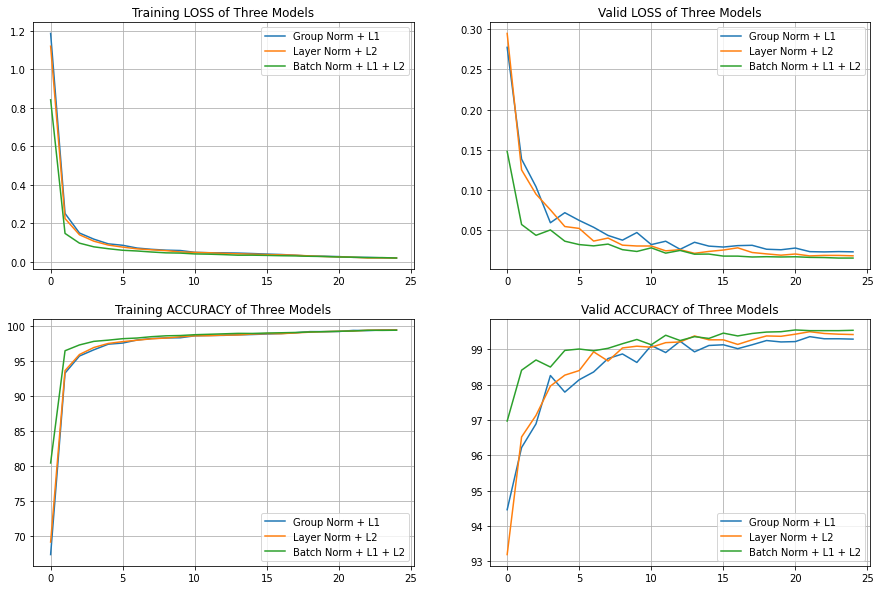

In [14]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0,0].set_title('Training LOSS of Three Models')
axs[0,0].plot(history_gn[1], label='Group Norm + L1')
axs[0,0].plot(history_ln[1], label='Layer Norm + L2')
axs[0,0].plot(history_bn[1], label='Batch Norm + L1 + L2')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].set_title('Valid LOSS of Three Models')
axs[0,1].plot(history_gn[3], label='Group Norm + L1')
axs[0,1].plot(history_ln[3], label='Layer Norm + L2')
axs[0,1].plot(history_bn[3], label='Batch Norm + L1 + L2')
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].set_title('Training ACCURACY of Three Models')
axs[1,0].plot(history_gn[0], label='Group Norm + L1')
axs[1,0].plot(history_ln[0], label='Layer Norm + L2')
axs[1,0].plot(history_bn[0], label='Batch Norm + L1 + L2')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].set_title('Valid ACCURACY of Three Models')
axs[1,1].plot(history_gn[2], label='Group Norm + L1')
axs[1,1].plot(history_ln[2], label='Layer Norm + L2')
axs[1,1].plot(history_bn[2], label='Batch Norm + L1 + L2')
axs[1,1].legend()
axs[1,1].grid()
plt.show()

In [15]:
def plot_misclassified(model, test_loader, norm_name):
  count = 0
  k = 0
  misclf = list()
  while count<=20:
    img, label = test_loader.dataset[k]
    pred = model(img.unsqueeze(0).to(device)) # Prediction
    pred = pred.argmax().item()

    k += 1
    if pred!=label:
      misclf.append((img, label, pred))
      count += 1
  
  rows, cols = 5,4
  figure = plt.figure(figsize=(10,14))

  for i in range(1, cols * rows + 1):
    img, label, pred = misclf[i-1]

    figure.add_subplot(rows, cols, i) # adding sub plot
    plt.suptitle(norm_name, fontsize=10)
    plt.title(f"Predcited label {pred}\n True Label: {label}") # title of plot
    plt.axis("off") # hiding the axis
    plt.imshow(img.squeeze(), cmap="gray") # showing the plot

  plt.show()

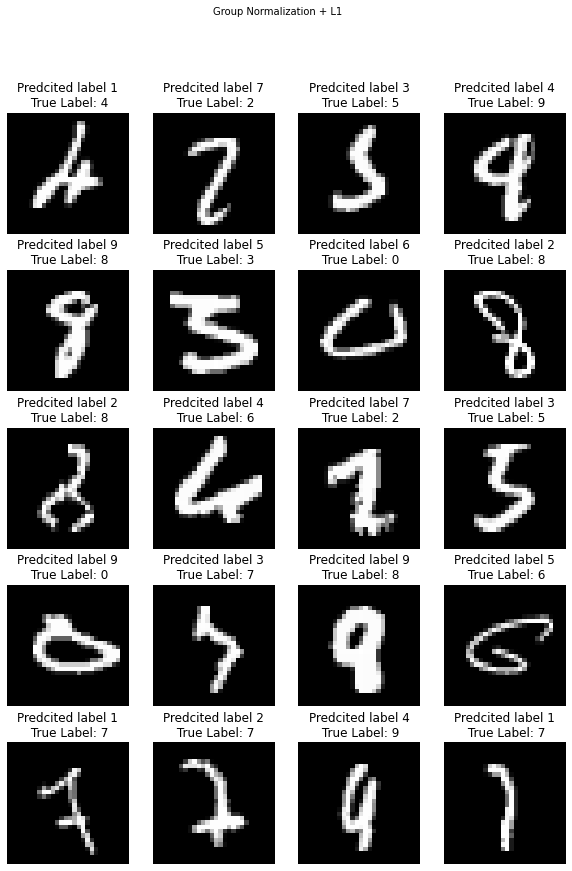

In [16]:
plot_misclassified(model_gn, test_loader, 'Group Normalization + L1')

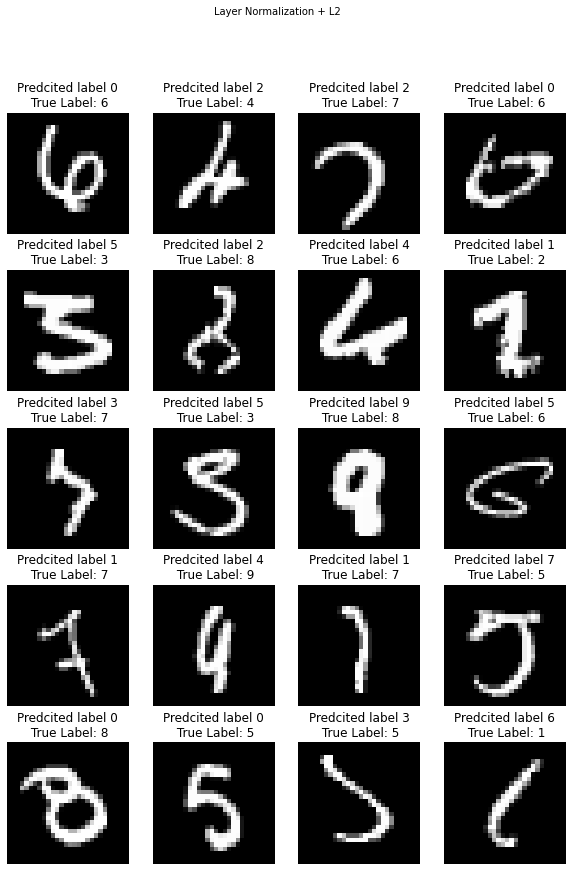

In [17]:
plot_misclassified(model_ln, test_loader, 'Layer Normalization + L2')

In [18]:
plot_misclassified(model_bn, test_loader, 'Batch Normalization + L1 + L2')

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 16, 1, 1])

In [19]:
def error_rate(model, test_loader):
  model.eval()
  err_count = 0

  for img, target in test_loader:
    img, target = img.to(device), target.to(device)
    output = model(img)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    err_count += pred.not_equal(target.view_as(pred)).sum().item()
  
  return (100. * err_count / len(test_loader.dataset))

In [20]:
print('Group Norm + L1 \t |\t', error_rate(model_gn, test_loader))
print('Layer Norm + L2 \t |\t', error_rate(model_ln, test_loader))
print('Batch Norm + L1 + L2\t |\t', error_rate(model_bn, test_loader))

Group Norm + L1 	 |	 0.64
Layer Norm + L2 	 |	 0.5
Batch Norm + L1 + L2	 |	 0.45
